Cost function value after convergence: 0.2284163510866227
Learning parameter value after convergence:
 [ 1.94027619 -1.90331374] 
 0.02854618439328577


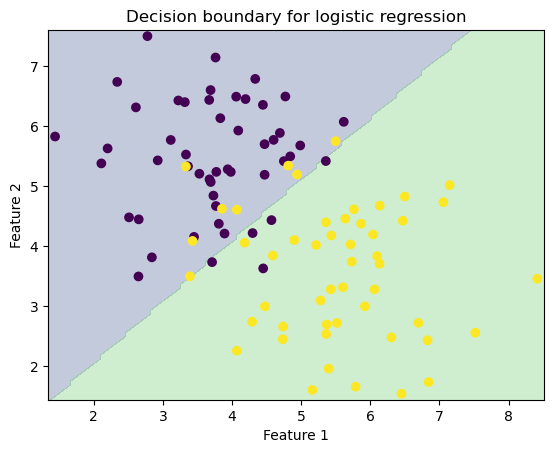

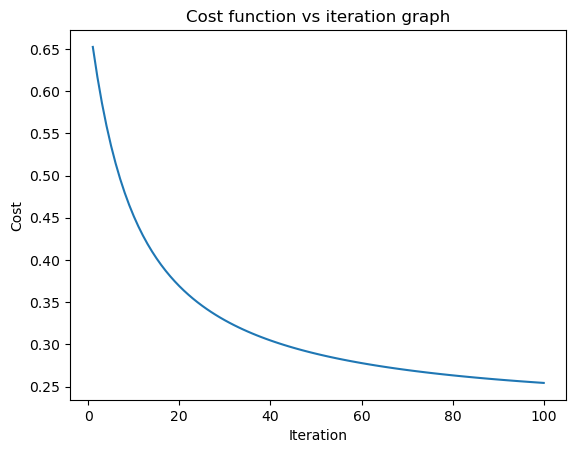

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = 1 / (1 + np.exp(-linear_model))
            gradient = np.dot(X.T, (y_predicted - y)) / n_samples
            self.weights -= self.learning_rate * gradient
            self.bias -= self.learning_rate * np.mean(y_predicted - y)
            self.cost_history.append(self.compute_cost(X, y))

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = 1 / (1 + np.exp(-linear_model))
        y_predicted = np.round(y_predicted)
        return y_predicted

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = 1 / (1 + np.exp(-linear_model))
        return y_predicted.reshape(-1, 2)

    def compute_cost(self, X, y):
        n_samples, n_features = X.shape
        y_predicted = 1 / (1 + np.exp(-np.dot(X, self.weights) - self.bias))
        cost = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
        return cost

def question1():
    # Load data
    X = np.loadtxt('C:\\Projects\\Logistic Regression\\logisticX.csv', delimiter=',')
    y = np.loadtxt('C:\\Projects\\Logistic Regression\\logisticY.csv', delimiter=',')

    # Create logistic regression model
    model = LogisticRegression(learning_rate=0.1, iterations=1000)

    # Train the model
    model.fit(X, y)

    # Display cost function value and learning parameter value after convergence
    print("Cost function value after convergence:", model.cost_history[-1])
    print("Learning parameter value after convergence:\n", model.weights, "\n", model.bias)

    # Calculate the decision boundary
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    proba = model.predict_proba(grid.reshape(-1, 2))
    y_grid = (proba.reshape(xx1.shape) > 0.5)

    # Plot decision boundary
    plt.contourf(xx1, xx2, y_grid, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision boundary for logistic regression')
    plt.show()

def question2():
    # Load data
    X = np.loadtxt('C:\\Projects\\Logistic Regression\\logisticX.csv', delimiter=',')
    y = np.loadtxt('C:\\Projects\\Logistic Regression\\logisticY.csv', delimiter=',')

    # Create logistic regression model
    model = LogisticRegression(learning_rate=0.1, iterations=100)

    # Train the model
    model.fit(X, y)

    # Plot cost function vs iteration graph
    plt.plot(range(1, len(model.cost_history)+1), model.cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost function vs iteration graph')
    plt.show()

def question3():
    # Load data
    X = np.loadtxt('C:\\Projects\\Logistic Regression\\logisticX.csv', delimiter=',')
    y = np.loadtxt('C:\\Projects\\Logistic Regression\\logisticY.csv', delimiter=',')

    # Create logistic regression model
    model = LogisticRegression(learning_rate=0.1, iterations=1000)

    # Train the model
    model.fit(X, y)

    # Plot the given dataset on a graph, use different colours for different classes and also show the decision boundary
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    proba = model.predict_proba(grid)
    y_grid = proba[:, 1] > 0.5
    y_grid = y_grid.reshape(xx1.shape)

    plt.contourf(xx1, xx2, y_grid, alpha=0.3, cmap='viridis')
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic regression decision boundary')
    plt.legend()
    plt.show()

def question4():
    # Load data
    X = np.loadtxt('C:\\Projects\\Logistic Regression\\logisticX.csv', delimiter=',')
    y = np.loadtxt('C:\\Projects\\Logistic Regression\\logisticY.csv', delimiter=',')

    # Create logistic regression model
    model_1 = LogisticRegression(learning_rate=0.1, iterations=100)
    model_2 = LogisticRegression(learning_rate=5, iterations=100)

    # Train both models
    model_1.fit(X, y)
    model_2.fit(X, y)

    # Plot cost function vs iteration graph for both models on the same graph
    plt.plot(range(1, len(model_1.cost_history)+1), model_1.cost_history, label='Learning Rate = 0.1')
    plt.plot(range(1, len(model_2.cost_history)+1), model_2.cost_history, label='Learning Rate = 5')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost function vs iteration graph')
    plt.legend()
    plt.show()

def question5():
    # Load data
    X = np.loadtxt('C:\\Projects\\Logistic Regression\\logisticX.csv', delimiter=',')
    y = np.loadtxt('C:\\Projects\\Logistic Regression\\logisticY.csv', delimiter=',')

question1()

question2()

